# A Formula for Success: Predicting How to Win in Baseball
### Notebook 1

## I. The Problem
Baseball is a sport of numbers and statistics. Because of this, there are all sorts of measurements of what happened in a game, as well as team and specific player performance. Over the years, and made more popular by fantasy sports and books/movies such as <i>Moneyball</i>, statistics have gotten even better at determining the value of players. These advanced statistics are commonly referred to as sabermetrics.

But what is the formula for a team's success? Obviously, it's winning, because a team must win in order to become championship contenders. And obviously, winning is accomplished by scoring more runs than your opponent. But if you were a general manager of a baseball franchise, you would want to go beyond that to determine a more precise equation to field a consistently winning team. Then, based on this formula, a general manager should be able to determine a player's value in terms of contributing to a team's winning chances.

### Research Questions

As such, this project focuses on answering the following questions:
* What features most significantly impact the winning percentage of a given Major League Baseball (MLB) team?
* For those given features, to what extent do they impact a team's winning percentage?
* Based on this, who has been the most valuable player in contributing to a team's winning percentage from 2015-2020?
    
By answering these questions, a general manager can build a roster to maximize it's odds of winning. As such, a general manager could target particular players in free agency or through trades to acquire them. Furthermore, since spending in baseball is limited based on what a particular team can afford in its market, as well as a tax beyond a particular salary threshold, a general manager could use this formula to determine if a given player is an improvement over a player currently rostered at that position on the team.

This particular notebook will work to answer the first two of the research questions.

## II. Data Acquisition
To answer these questions, we will need to find data over the last few seasons from MLB. We will need both team statistics to determine the equation for winning and player statistics to determine who has contributed the most to winning. To acquire this data, we will use the MLB statistic repository Fangraphs.com. This data will be pulled specifically from the [database found here](https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=y&type=8&season=2020&month=0&season1=2020&ind=0). We will use multiple requests, then export each of them. For the team stats, you click on the "Team Stats" panel, select multiple seasons, split them, hit submit, then export. Do this for the Batting, Pitching, and Fielding tabs. We split the seasons because a given team will vary in its performance--and its roster--from year to year, adding to our sample size. To build an adequate sample size, we will pull data for each season beginning in 2006. For the individual stats, you click on the "Player Stats" panel; because we are viewing individual players stats over the past few seasons, we will select "Multiple Seasons" from 2015 to 2020.

While the years selected for this sample seem arbitrary, they are not. Baseball is known to have time periods that stylize play, commonly known as eras. From the late 1980s into most of the 2000s, power hitting had a surprising jolt due to the prevalence of steroids and other performance-enhancing drugs. Long-standing home run records were broken multiple times during this period. The 2006 season is when MLB began to test and discipline players for performance-enhancing drugs, and therefore is a good starting point for our dataset.

This process can easily be repeated by others who wish to replicate or customize the data pulled for their own usage. To begin, we will need to pull the various dataframes, then combine them into a single dataframe.

In [1]:
# import needed tools and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Retrieve CSVs into dataframes
team_bat = pd.read_csv(r'~/Github/DATA601_FinalProject/Data/TeamStats_Batting.csv')
team_pitch = pd.read_csv(r'~/Github/DATA601_FinalProject/Data/TeamStats_Pitching.csv')
team_field = pd.read_csv(r'~/Github/DATA601_FinalProject/Data/TeamStats_Fielding.csv')

# Update team names with year to prevent confusion (So 2019 Orioles and 2020 Orioles are clear in Team column)
team_bat['TeamYear'] = team_bat['Season'].astype(str) + '_' + team_bat['Team']
team_pitch['TeamYear'] = team_pitch['Season'].astype(str) + '_' + team_pitch['Team']
team_field['TeamYear'] = team_field['Season'].astype(str) + '_' + team_field['Team']

# Move new TeamYear column to front
team_bat = team_bat[['TeamYear'] + [col for col in team_bat.columns if col != 'TeamYear']]
team_pitch = team_pitch[['TeamYear'] + [col for col in team_pitch.columns if col != 'TeamYear']]
team_field = team_field[['TeamYear'] + [col for col in team_field.columns if col != 'TeamYear']]

# Merge dataframes
teamstats = pd.merge(team_bat, team_field, how = 'outer', on = 'TeamYear')
teamstats = pd.merge(teamstats, team_pitch, how = 'outer', on = 'TeamYear')

# Drop repeat columns and rearrange columns
teamstats.drop(['Season_x', 'Team_x', 'Season_y', 'Team_y'], axis=1, inplace = True)
move_cols = ['TeamYear', 'Season', 'Team']
teamstats = teamstats[move_cols + [col for col in teamstats.columns if col not in move_cols]]

# Check dataframe
teamstats


,TeamYear,Season,Team,G_x,PA,HR,R,RBI,SB,BB%,...,HR/9,BABIP_y,LOB%,GB%,HR/FB,EV_y,ERA,FIP,xFIP,WAR_y
0,2019_Astros,2019,Astros,2309,6394,288,920,891,67,10.10%,...,1.42,0.270,76.80%,43.60%,16.70%,88.1,3.66,3.98,3.80,23.7
1,2016_Cubs,2016,Cubs,2332,6335,199,808,767,66,10.40%,...,1.01,0.255,77.50%,46.90%,13.10%,88.3,3.15,3.77,3.74,18.8
2,2011_Yankees,2011,Yankees,2301,6306,222,867,836,147,9.90%,...,0.94,0.297,75.00%,44.20%,9.90%,NaN,3.73,3.87,3.84,17.3
3,2015_Blue Jays,2015,Blue Jays,2337,6231,232,891,852,88,9.10%,...,1.08,0.278,72.70%,43.70%,11.00%,88.1,3.81,4.09,4.14,13.7
4,2011_Red Sox,2011,Red Sox,2269,6414,203,875,842,102,9.00%,...,0.96,0.285,70.80%,42.30%,9.10%,NaN,4.20,4.05,4.13,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2010_Pirates,2010,Pirates,2327,5974,126,587,570,87,7.80%,...,1.06,0.311,67.40%,44.00%,10.00%,NaN,5.00,4.45,4.35,6.4
446,2020_Pirates,2020,Pirates,873,2134,59,219,210,16,7.80%,...,1.40,0.280,70.20%,43.40%,16.20%,88.5,4.68,4.80,4.63,2.7
447,2018_Orioles,2018,Orioles,2313,6034,188,622,593,81,7.00%,...,1.47,0.310,70.00%,41.90%,14.40%,88.6,5.19,4.98,4.73,7.3
448,2020_Rangers,2020,Rangers,865,2147,62,224,204,49,7.80%,...,1.41,0.277,68.60%,40.60%,14.00%,88.5,5.02,4.88,5.00,3.8


In [49]:
# Save dataframe to CSV
teamstats.to_csv(r'~/Github/DATA601_FinalProject/Data/TeamStats_Combined.csv', index = None)

## III. Data Exploration - Part 1

Why part one. Well, as you will see below, we will actually need to do some data cleaning and feature engineering in order to properly explore the data.

In [3]:
# Copy teamstats dataframe by pulling from newly saved CSV
df = pd.read_csv(r'~/Github/DATA601_FinalProject/Data/TeamStats_Combined.csv')
df.head()

,TeamYear,Season,Team,G_x,PA,HR,R,RBI,SB,BB%,...,HR/9,BABIP_y,LOB%,GB%,HR/FB,EV_y,ERA,FIP,xFIP,WAR_y
0,2019_Astros,2019,Astros,2309,6394,288,920,891,67,10.10%,...,1.42,0.270,76.80%,43.60%,16.70%,88.1,3.66,3.98,3.80,23.7
1,2016_Cubs,2016,Cubs,2332,6335,199,808,767,66,10.40%,...,1.01,0.255,77.50%,46.90%,13.10%,88.3,3.15,3.77,3.74,18.8
2,2011_Yankees,2011,Yankees,2301,6306,222,867,836,147,9.90%,...,0.94,0.297,75.00%,44.20%,9.90%,NaN,3.73,3.87,3.84,17.3
3,2015_Blue Jays,2015,Blue Jays,2337,6231,232,891,852,88,9.10%,...,1.08,0.278,72.70%,43.70%,11.00%,88.1,3.81,4.09,4.14,13.7
4,2011_Red Sox,2011,Red Sox,2269,6414,203,875,842,102,9.00%,...,0.96,0.285,70.80%,42.30%,9.10%,NaN,4.20,4.05,4.13,14.3


In [4]:
# Look at the stats of the data
df.describe()

,Season,G_x,PA,HR,R,RBI,SB,ISO,BABIP_x,AVG,...,IP,K/9,BB/9,HR/9,BABIP_y,EV_y,ERA,FIP,xFIP,WAR_y
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.000000,180.000000,450.000000,450.000000,450.000000,450.000000
mean,2013.000000,2235.120000,5926.313333,165.551111,696.640000,663.928889,87.968889,0.156176,0.298091,0.256207,...,1384.479556,7.656111,3.218422,1.087933,0.294978,88.266111,4.195667,4.195467,4.194889,13.729556
std,4.325302,366.571759,998.337742,44.132149,135.791335,130.392091,33.158040,0.021719,0.011826,0.012807,...,232.908178,0.989471,0.403770,0.204113,0.011406,0.699654,0.531817,0.423101,0.376032,5.399022
min,2006.000000,827.000000,2011.000000,51.000000,219.000000,204.000000,14.000000,0.104000,0.245000,0.212000,...,473.000000,5.700000,2.150000,0.590000,0.250000,86.200000,2.940000,3.180000,3.330000,-0.200000
25%,2009.000000,2269.000000,6090.250000,137.250000,651.000000,619.250000,65.000000,0.141000,0.291000,0.247000,...,1435.000000,6.952500,2.922500,0.950000,0.288000,87.900000,3.802500,3.890000,3.930000,9.725000
50%,2013.000000,2327.000000,6176.500000,165.000000,718.000000,686.000000,86.500000,0.154000,0.298000,0.256000,...,1445.000000,7.575000,3.200000,1.070000,0.295000,88.400000,4.170000,4.195000,4.190000,14.100000
75%,2017.000000,2376.000000,6260.750000,194.000000,771.000000,735.750000,110.750000,0.171000,0.306000,0.264000,...,1454.000000,8.225000,3.457500,1.200000,0.302000,88.700000,4.550000,4.467500,4.440000,17.475000
max,2020.000000,2574.000000,6537.000000,307.000000,968.000000,929.000000,200.000000,0.227000,0.332000,0.290000,...,1495.000000,10.980000,4.370000,1.900000,0.343000,89.900000,5.670000,5.560000,5.230000,30.400000


In [5]:
# Look at details of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TeamYear  450 non-null    object 
 1   Season    450 non-null    int64  
 2   Team      450 non-null    object 
 3   G_x       450 non-null    int64  
 4   PA        450 non-null    int64  
 5   HR        450 non-null    int64  
 6   R         450 non-null    int64  
 7   RBI       450 non-null    int64  
 8   SB        450 non-null    int64  
 9   BB%       450 non-null    object 
 10  K%        450 non-null    object 
 11  ISO       450 non-null    float64
 12  BABIP_x   450 non-null    float64
 13  AVG       450 non-null    float64
 14  OBP       450 non-null    float64
 15  SLG       450 non-null    float64
 16  wOBA      450 non-null    float64
 17  wRC+      450 non-null    int64  
 18  EV_x      180 non-null    float64
 19  BsR       450 non-null    float64
 20  Off       450 non-null    float6

At first glance, we see a mixture of different datatypes, including strings/objects, integers, and floats. However, aside from the "Team" column, all of our data should be numerical. This means that the other columns labeled as objects are incorrectly categorized. If we look back at the header (first five rows) of the table, we see that this is due to the percentage sign (%) being used in the column. We will need to correct this during our data cleaning. We also see some columns have many null values. We will need to clean these as well.

In [6]:
# Check the number of unique values
df.nunique(axis = 0)

TeamYear    450
Season       15
Team         31
G_x         240
PA          294
           ... 
EV_y         35
ERA         182
FIP         161
xFIP        146
WAR_y       184
Length: 64, dtype: int64

One thing that stands out is that there are 31 unique entries for the Team feature. Considering there are only 30 MLB teams, we know that there must be something we need to alter here. No teams/franchises have moved; however, the Tampa Bay Devil Rays did rename themselves the Rays for the 2008 season. That could be the cause. Let's check if that is what we are seeing here.

In [7]:
# Look for team name including string 'Rays'
df[df['Team'].str.contains('Rays')]

,TeamYear,Season,Team,G_x,PA,HR,R,RBI,SB,BB%,...,HR/9,BABIP_y,LOB%,GB%,HR/FB,EV_y,ERA,FIP,xFIP,WAR_y
8,2009_Rays,2009,Rays,2345,6223,199,803,765,194,10.30%,...,1.15,0.289,71.20%,41.50%,10.50%,NaN,4.36,4.37,4.30,12.4
32,2010_Rays,2010,Rays,2361,6270,160,802,769,172,10.70%,...,1.08,0.278,75.20%,41.30%,9.90%,NaN,3.78,4.09,4.00,16.3
42,2008_Rays,2008,Rays,2299,6312,180,774,735,142,9.90%,...,1.02,0.277,74.00%,40.80%,9.30%,NaN,3.82,4.22,4.35,19.2
51,2013_Rays,2013,Rays,2423,6242,165,700,670,73,9.40%,...,0.94,0.284,73.60%,44.60%,10.60%,NaN,3.74,3.71,3.71,14.5
57,2011_Rays,2011,Rays,2284,6152,172,707,674,155,9.30%,...,1.00,0.265,75.50%,42.10%,9.80%,NaN,3.58,4.03,4.01,16.8
114,2012_Rays,2012,Rays,2406,6105,175,697,665,134,9.40%,...,0.86,0.277,75.50%,47.90%,10.70%,NaN,3.19,3.51,3.59,20.4
126,2018_Rays,2018,Rays,2371,6195,150,716,664,128,8.70%,...,1.02,0.278,73.30%,43.90%,11.50%,88.3,3.75,3.82,3.98,17.5
133,2019_Rays,2019,Rays,2459,6285,217,769,730,94,8.60%,...,1.10,0.290,73.70%,44.10%,13.40%,87.9,3.67,3.65,3.89,25.3
152,2017_Rays,2017,Rays,2345,6147,228,694,671,88,8.90%,...,1.20,0.283,73.00%,43.00%,12.80%,87.7,3.99,4.17,4.29,15.0
176,2014_Rays,2014,Rays,2352,6205,117,612,586,63,8.50%,...,0.89,0.286,74.10%,40.80%,9.10%,NaN,3.56,3.56,3.62,14.1


As we see above, the Tampa Bay franchise has two names in our dataset: the Devil Rays and the Rays. We will need to clean this up for simplicity in the data cleaning section.

Since our target variable would be wins, let's take a look at it more closely.

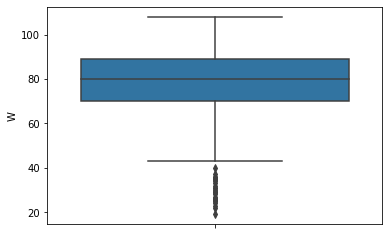

In [8]:
# Box plot for wins
sns.boxplot(y = df['W'])

We see a ton of outliers here, which is something worth exploring. Let's view this distribution in a histogram.

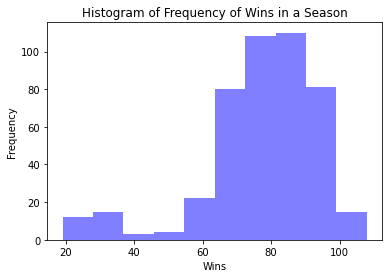

In [9]:
# Histogram of wins
x = df['W']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)

# Histogram settings
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency of Wins in a Season')
plt.show()

We would expect to see a rather normal distribution here, and we can see a portion of the histogram between approximately 50 and 105 wins appears normally distributed. So what could explain this?

It is very likely the result of the shortened 2020 season. The standard MLB season is 162 games; due to the COVID-19 pandemic, the 2020 season was shortened to only 60 games.

This leaves us with a decision to make: do we remove the 2020 season altogether, or do we still keep it as part of our dataset?

## III. Data Cleaning - Part 1

The solution we will use will be to view wins as a percentage of total games played rather than raw total wins. This is otherwise known as winning percentage. We will need to create this as a new feature. 

In [10]:
# Create new Winning Percentage column
# Win percentage = Wins / Games Started
df['W%'] = (df['W']/df['GS'])

# Check with header
df[['Team', 'W', 'L', 'W%']]

,Team,W,L,W%
0,Astros,107,55,0.660494
1,Cubs,103,58,0.635802
2,Yankees,97,65,0.598765
3,Blue Jays,93,69,0.574074
4,Red Sox,90,72,0.555556
...,...,...,...,...
445,Pirates,57,105,0.351852
446,Pirates,19,41,0.316667
447,Orioles,47,115,0.290123
448,Rangers,22,38,0.366667


Now let's check the box plot and histogram again.

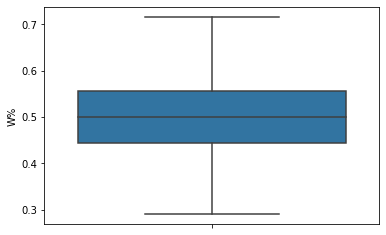

In [11]:
# Box plot for win percentage
sns.boxplot(y = df['W%'])

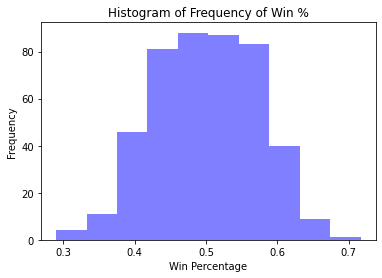

In [20]:
# Histogram of win percentage
x = df['W%']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)

# Histogram settings
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency of Win %')
plt.savefig('WPHistogram.png', bbox_inches = 'tight')
plt.show()

We see that the win percentage is evenly distributed, which shows that the shortened 2020 season was the issue. However, by extension, we can assume that other columns with raw total data as opposed to ratio data is similarly affected by the shortened season. 

This means that we must update these columns as well prior to exploring the data.

In [13]:
# Create list of columns to be converted
col_change = ['PA', 'HR', 'R', 'RBI', 'SB', 'Inn', 'BIZ', 'Plays','IP']

# Rewrite columns with their "per game" data
df[col_change] = df[col_change].div(df['GS'].values, axis = 0)

# Check work
df.head(10)

,TeamYear,Season,Team,G_x,PA,HR,R,RBI,SB,BB%,...,BABIP_y,LOB%,GB%,HR/FB,EV_y,ERA,FIP,xFIP,WAR_y,W%
0,2019_Astros,2019,Astros,2309,39.469136,1.777778,5.679012,5.500000,0.413580,10.10%,...,0.270,76.80%,43.60%,16.70%,88.1,3.66,3.98,3.80,23.7,0.660494
1,2016_Cubs,2016,Cubs,2332,39.104938,1.228395,4.987654,4.734568,0.407407,10.40%,...,0.255,77.50%,46.90%,13.10%,88.3,3.15,3.77,3.74,18.8,0.635802
2,2011_Yankees,2011,Yankees,2301,38.925926,1.370370,5.351852,5.160494,0.907407,9.90%,...,0.297,75.00%,44.20%,9.90%,NaN,3.73,3.87,3.84,17.3,0.598765
3,2015_Blue Jays,2015,Blue Jays,2337,38.462963,1.432099,5.500000,5.259259,0.543210,9.10%,...,0.278,72.70%,43.70%,11.00%,88.1,3.81,4.09,4.14,13.7,0.574074
4,2011_Red Sox,2011,Red Sox,2269,39.592593,1.253086,5.401235,5.197531,0.629630,9.00%,...,0.285,70.80%,42.30%,9.10%,NaN,4.20,4.05,4.13,14.3,0.555556
5,2013_Red Sox,2013,Red Sox,2264,39.395062,1.098765,5.265432,5.055556,0.759259,9.10%,...,0.294,74.50%,42.90%,10.20%,NaN,3.79,3.84,3.89,15.8,0.598765
6,2010_Reds,2010,Reds,2370,38.796296,1.160494,4.876543,4.697531,0.574074,8.30%,...,0.288,73.60%,42.90%,9.40%,NaN,4.02,4.12,4.13,12.8,0.561728
7,2016_Red Sox,2016,Red Sox,2284,39.012346,1.283951,5.419753,5.160494,0.512346,8.80%,...,0.293,72.90%,41.50%,11.40%,88.1,4.00,4.00,4.20,18.8,0.574074
8,2009_Rays,2009,Rays,2345,38.413580,1.228395,4.956790,4.722222,1.197531,10.30%,...,0.289,71.20%,41.50%,10.50%,NaN,4.36,4.37,4.30,12.4,0.518519
9,2007_Phillies,2007,Phillies,2446,40.351852,1.314815,5.506173,5.246914,0.851852,9.80%,...,0.301,71.50%,43.50%,11.90%,NaN,4.76,4.86,4.52,9.9,0.549383


Thankfully, this worked, as we see our data has been converted to a per-game basis. We will also need to change the string columns with percentages in them to floats. We will do this next.

In [14]:
# Create list of columns with percentages to convert to floats
col_change2 = ['BB%', 'K%', 'LOB%', 'GB%', 'HR/FB']

# Convert columns
df[col_change2] = df[col_change2].replace('%', '', regex = True).astype('float')/100

# Check results
df.head()

,TeamYear,Season,Team,G_x,PA,HR,R,RBI,SB,BB%,...,BABIP_y,LOB%,GB%,HR/FB,EV_y,ERA,FIP,xFIP,WAR_y,W%
0,2019_Astros,2019,Astros,2309,39.469136,1.777778,5.679012,5.500000,0.413580,0.101,...,0.270,0.768,0.436,0.167,88.1,3.66,3.98,3.80,23.7,0.660494
1,2016_Cubs,2016,Cubs,2332,39.104938,1.228395,4.987654,4.734568,0.407407,0.104,...,0.255,0.775,0.469,0.131,88.3,3.15,3.77,3.74,18.8,0.635802
2,2011_Yankees,2011,Yankees,2301,38.925926,1.370370,5.351852,5.160494,0.907407,0.099,...,0.297,0.750,0.442,0.099,NaN,3.73,3.87,3.84,17.3,0.598765
3,2015_Blue Jays,2015,Blue Jays,2337,38.462963,1.432099,5.500000,5.259259,0.543210,0.091,...,0.278,0.727,0.437,0.110,88.1,3.81,4.09,4.14,13.7,0.574074
4,2011_Red Sox,2011,Red Sox,2269,39.592593,1.253086,5.401235,5.197531,0.629630,0.090,...,0.285,0.708,0.423,0.091,NaN,4.20,4.05,4.13,14.3,0.555556


By cross-referencing with the previous header, we see that we have successfully converted those percentage-objects to floats.

Another large decision we will need to make is what to do with our null values. We saw that some of our columns have null values for greater tha 10% of the rows. Some are missing more than half. Given that the all columns with null values have at least 60 out of a total of 450 rows, each of these columns will be dropped. We can also drop the wins ('W') and losses ('L') columns because they are unnecessary now that we have created win percentage.

In [15]:
# Drop columns with null values
df.dropna(axis=1, inplace = True)

# Drop wins and losses
df.drop(['W', 'L'], axis=1, inplace = True)

Now that we've dropped those, let's also update the Tampa Bay Rays/Devil Rays. We will rename the Devil Rays to the Rays (just as in real life), so that it does not appear that there are 31 franchises in MLB.

In [16]:
# Replace Devil Rays with Rays
df['Team'].replace('Devil Rays', 'Rays', inplace = True)

# Correct TeamYear column as well
df['TeamYear'] = df['Season'].astype(str) + '_' + df['Team']

# Check work
df[df['Team'].str.contains('Rays')]

,TeamYear,Season,Team,G_x,PA,HR,R,RBI,SB,BB%,...,HR/9,BABIP_y,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR_y,W%
8,2009_Rays,2009,Rays,2345,38.413580,1.228395,4.956790,4.722222,1.197531,0.103,...,1.15,0.289,0.712,0.415,0.105,4.36,4.37,4.30,12.4,0.518519
32,2010_Rays,2010,Rays,2361,38.703704,0.987654,4.950617,4.746914,1.061728,0.107,...,1.08,0.278,0.752,0.413,0.099,3.78,4.09,4.00,16.3,0.592593
42,2008_Rays,2008,Rays,2299,38.962963,1.111111,4.777778,4.537037,0.876543,0.099,...,1.02,0.277,0.740,0.408,0.093,3.82,4.22,4.35,19.2,0.598765
51,2013_Rays,2013,Rays,2423,38.294479,1.012270,4.294479,4.110429,0.447853,0.094,...,0.94,0.284,0.736,0.446,0.106,3.74,3.71,3.71,14.5,0.564417
57,2011_Rays,2011,Rays,2284,37.975309,1.061728,4.364198,4.160494,0.956790,0.093,...,1.00,0.265,0.755,0.421,0.098,3.58,4.03,4.01,16.8,0.561728
114,2012_Rays,2012,Rays,2406,37.685185,1.080247,4.302469,4.104938,0.827160,0.094,...,0.86,0.277,0.755,0.479,0.107,3.19,3.51,3.59,20.4,0.555556
126,2018_Rays,2018,Rays,2371,38.240741,0.925926,4.419753,4.098765,0.790123,0.087,...,1.02,0.278,0.733,0.439,0.115,3.75,3.82,3.98,17.5,0.555556
133,2019_Rays,2019,Rays,2459,38.796296,1.339506,4.746914,4.506173,0.580247,0.086,...,1.10,0.290,0.737,0.441,0.134,3.67,3.65,3.89,25.3,0.592593
152,2017_Rays,2017,Rays,2345,37.944444,1.407407,4.283951,4.141975,0.543210,0.089,...,1.20,0.283,0.730,0.430,0.128,3.99,4.17,4.29,15.0,0.493827
176,2014_Rays,2014,Rays,2352,38.302469,0.722222,3.777778,3.617284,0.388889,0.085,...,0.89,0.286,0.741,0.408,0.091,3.56,3.56,3.62,14.1,0.475309


## IV. Data Exploration - Part 2

We can now proceed with more data exploration. 

Since our target variable is win percentage, let's take a look at the comparison of different teams' win percentage.

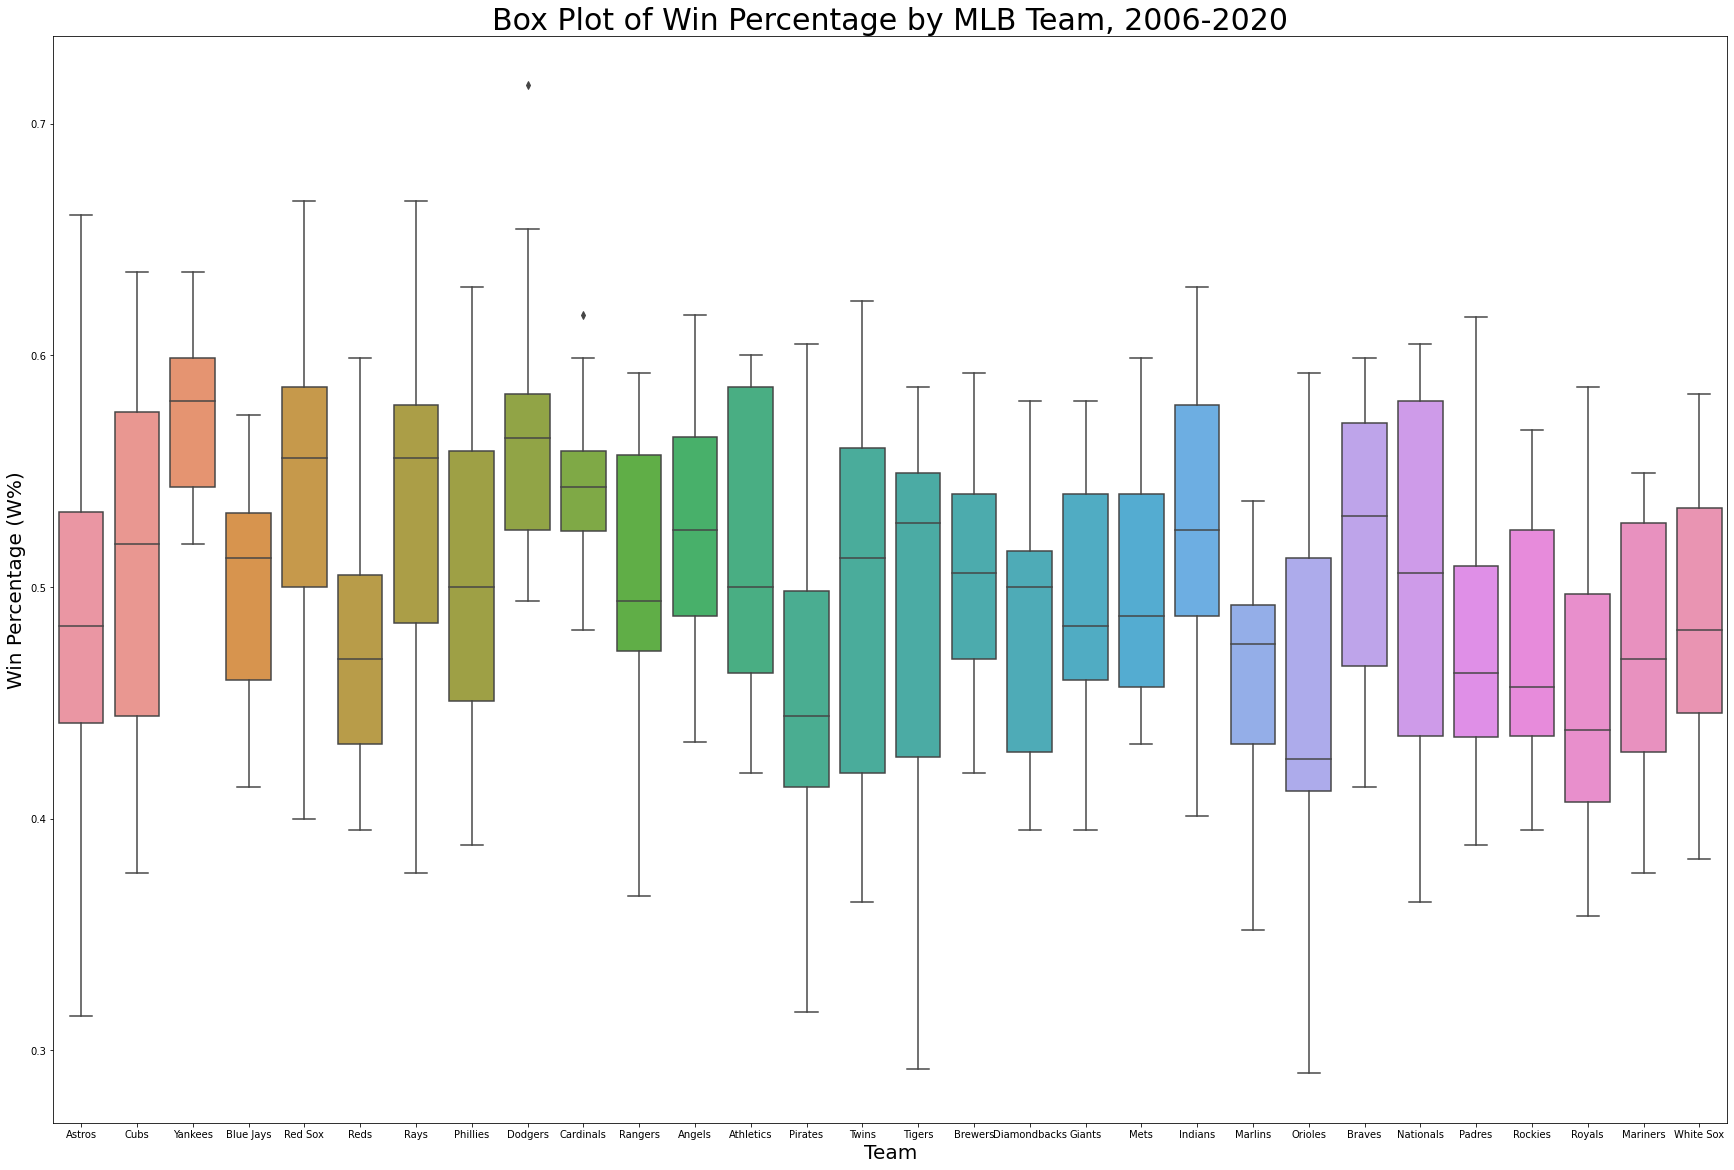

In [19]:
# Graph win percentage by team
plt.figure(figsize = (30, 20))
aplot = sns.boxplot(x = 'Team', y = 'W%', data = df)
aplot.axes.set_title('Box Plot of Win Percentage by MLB Team, 2006-2020', fontsize=30)
aplot.set_xlabel('Team', fontsize=20)
aplot.set_ylabel('Win Percentage (W%)', fontsize=20)
aplot.figure.savefig('BoxPlotWPTeam.png', bbox_inches = 'tight')


Some interesting trends we see here:
* Most teams have had a wide range of win percentages, indicating they had some good seasons and some bad seasons.
* The Yankees, Dodgers, and Cardinals were more consistent, as they have smaller spreads than most teams.
    * They also were consistently good teams, as they rarely had a win percentage below 0.5. The Dodgers even had an outlier season with a win percentage above 0.7.
* The Astros, Rays, Tigers, and Orioles have very large spreads, indicating their season win percentage has had more variability.
    * As an Orioles fan, I can sadly vouch for this. From 2006-2011, watching the Orioles was painful indeed, but 2012-2016 was much better until the team regressed again in 2017 and beyond.


Let's look at the box plots and histograms of more features.

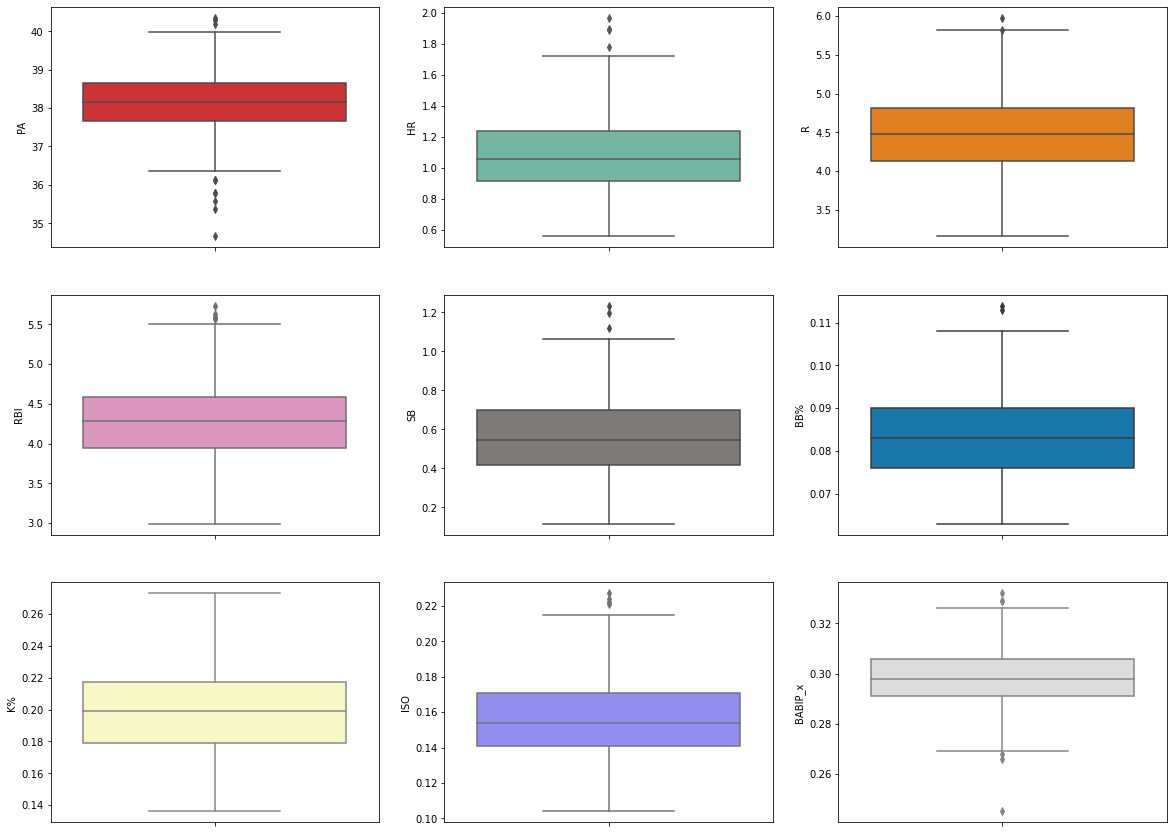

In [18]:
# Graphs settings for multiple features
plt.figure(figsize=(20, 15))
# Graphs of features
plt.subplot(3,3,1)
sns.boxplot(y = df['PA'], palette = 'Set1')
plt.subplot(3,3,2)
sns.boxplot(y = df['HR'], palette = 'Set2')
plt.subplot(3,3,3)
sns.boxplot(y = df['R'], palette = 'Set1_r')
plt.subplot(3,3,4)
sns.boxplot(y = df['RBI'], palette = 'Set2_r')
plt.subplot(3,3,5)
sns.boxplot(y = df['SB'], palette = 'cividis')
plt.subplot(3,3,6)
sns.boxplot(y = df['BB%'], palette = 'winter_r')
plt.subplot(3,3,7)
sns.boxplot(y = df['K%'],palette = 'Spectral')
plt.subplot(3,3,8)
sns.boxplot(y = df['ISO'], palette = 'cool')
plt.subplot(3,3,9)
sns.boxplot(y = df['BABIP_x'], palette = 'coolwarm')

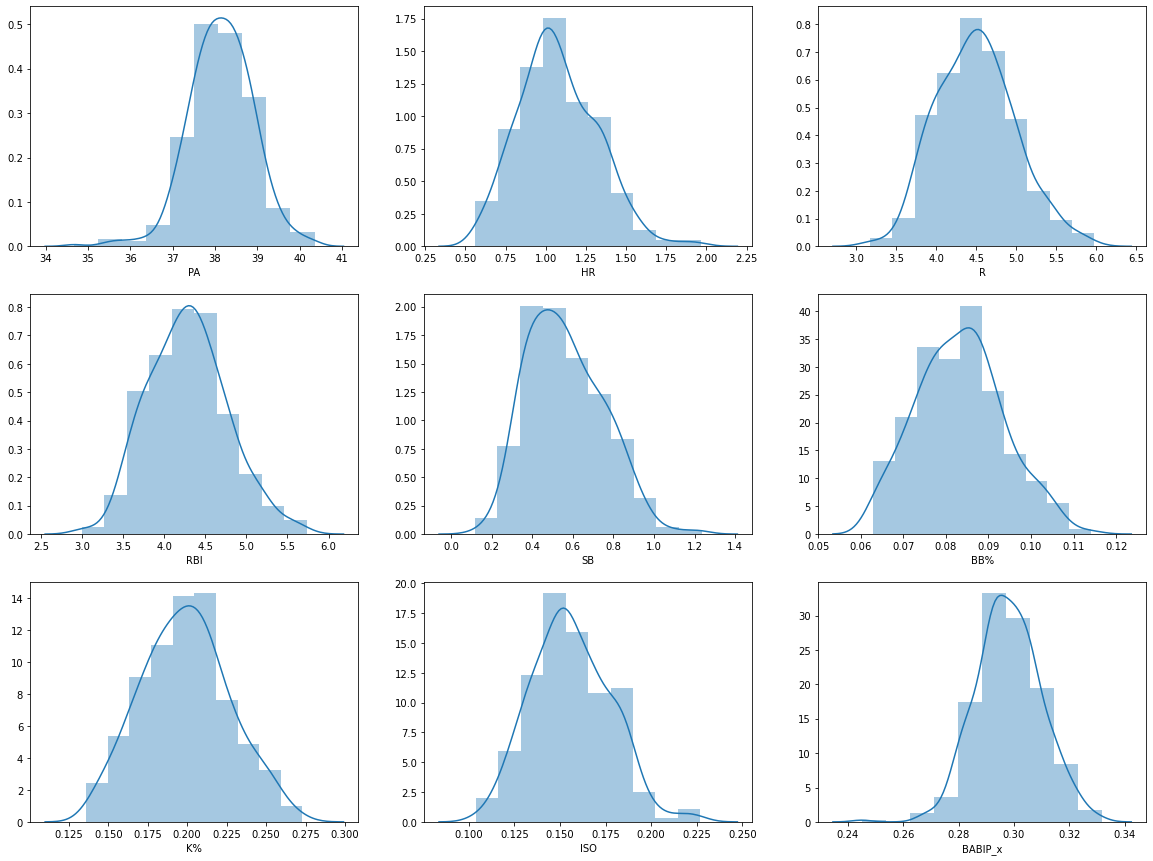

In [19]:
# Graphs settings for multiple features
plt.figure(figsize=(20, 15))
# Graphs of features
plt.subplot(3,3,1)
sns.distplot(df['PA'], bins = 10)
plt.subplot(3,3,2)
sns.distplot(df['HR'], bins = 10)
plt.subplot(3,3,3)
sns.distplot(df['R'], bins = 10)
plt.subplot(3,3,4)
sns.distplot(df['RBI'], bins = 10)
plt.subplot(3,3,5)
sns.distplot(df['SB'], bins = 10)
plt.subplot(3,3,6)
sns.distplot(df['BB%'], bins = 10)
plt.subplot(3,3,7)
sns.distplot(df['K%'],bins = 10)
plt.subplot(3,3,8)
sns.distplot(df['ISO'], bins = 10)
plt.subplot(3,3,9)
sns.distplot(df['BABIP_x'], bins = 10)

From the box plots above, we see a number of interesting trends.

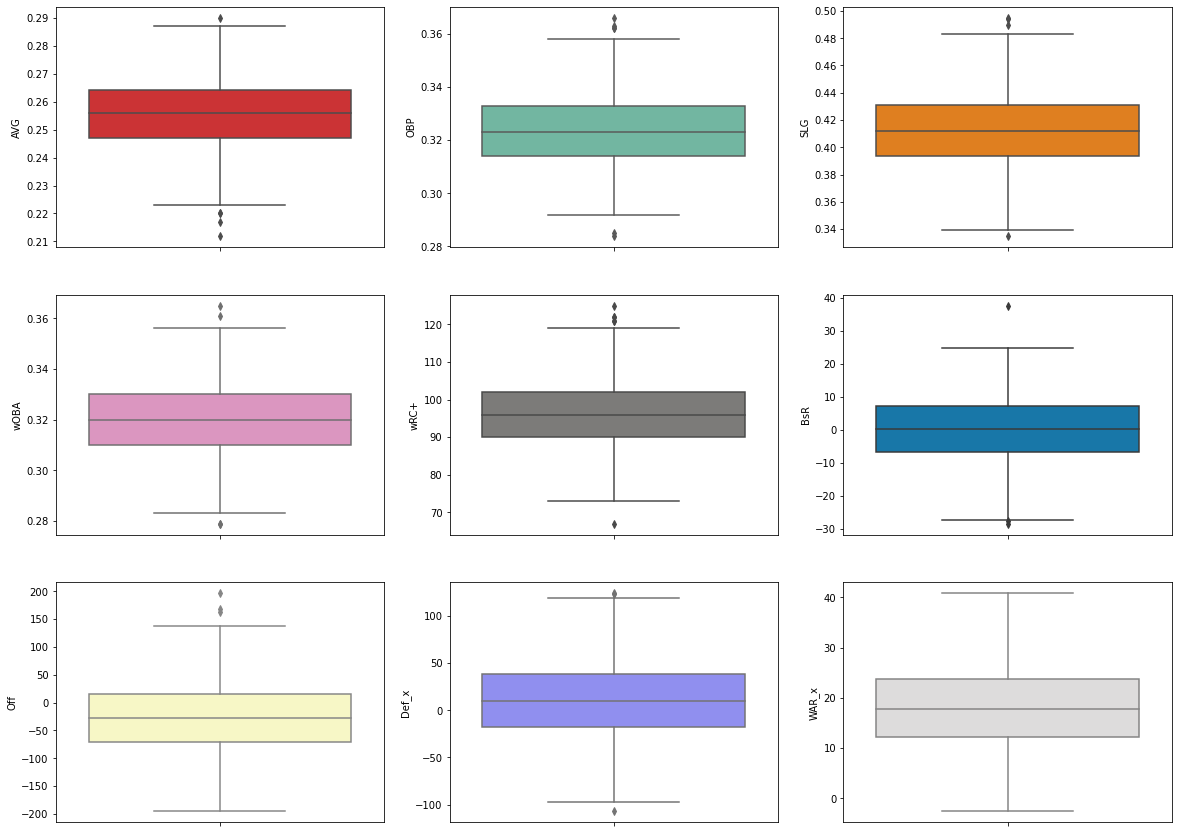

In [20]:
# Graphs settings for multiple features
plt.figure(figsize=(20, 15))
# Graphs of features
plt.subplot(3,3,1)
sns.boxplot(y = df['AVG'], palette = 'Set1')
plt.subplot(3,3,2)
sns.boxplot(y = df['OBP'], palette = 'Set2')
plt.subplot(3,3,3)
sns.boxplot(y = df['SLG'], palette = 'Set1_r')
plt.subplot(3,3,4)
sns.boxplot(y = df['wOBA'], palette = 'Set2_r')
plt.subplot(3,3,5)
sns.boxplot(y = df['wRC+'], palette = 'cividis')
plt.subplot(3,3,6)
sns.boxplot(y = df['BsR'], palette = 'winter_r')
plt.subplot(3,3,7)
sns.boxplot(y = df['Off'],palette = 'Spectral')
plt.subplot(3,3,8)
sns.boxplot(y = df['Def_x'], palette = 'cool')
plt.subplot(3,3,9)
sns.boxplot(y = df['WAR_x'], palette = 'coolwarm')

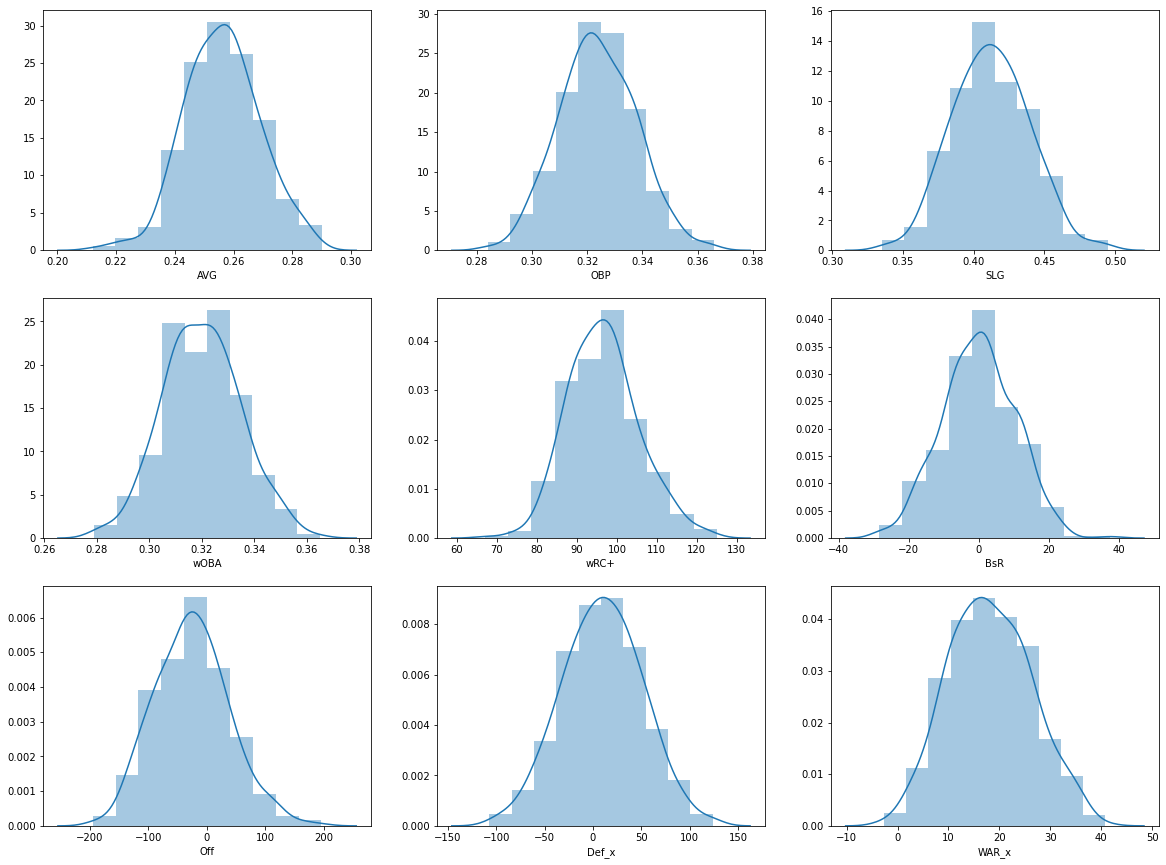

In [21]:
# Graphs settings for multiple features
plt.figure(figsize=(20, 15))
# Graphs of features
plt.subplot(3,3,1)
sns.distplot(df['AVG'], bins = 10)
plt.subplot(3,3,2)
sns.distplot(df['OBP'], bins = 10)
plt.subplot(3,3,3)
sns.distplot(df['SLG'], bins = 10)
plt.subplot(3,3,4)
sns.distplot(df['wOBA'], bins = 10)
plt.subplot(3,3,5)
sns.distplot(df['wRC+'], bins = 10)
plt.subplot(3,3,6)
sns.distplot(df['BsR'], bins = 10)
plt.subplot(3,3,7)
sns.distplot(df['Off'],bins = 10)
plt.subplot(3,3,8)
sns.distplot(df['Def_x'], bins = 10)
plt.subplot(3,3,9)
sns.distplot(df['WAR_x'], bins = 10)

In [ ]:
# Graphs settings for multiple features
plt.figure(figsize=(20, 15))
# Graphs of features
plt.subplot(3,3,1)
sns.boxplot(y = df['AVG'], palette = 'Set1')
plt.subplot(3,3,2)
sns.boxplot(y = df['OBP'], palette = 'Set2')
plt.subplot(3,3,3)
sns.boxplot(y = df['SLG'], palette = 'Set1_r')
plt.subplot(3,3,4)
sns.boxplot(y = df['wOBA'], palette = 'Set2_r')
plt.subplot(3,3,5)
sns.boxplot(y = df['wRC+'], palette = 'cividis')
plt.subplot(3,3,6)
sns.boxplot(y = df['BsR'], palette = 'winter_r')
plt.subplot(3,3,7)
sns.boxplot(y = df['Off'],palette = 'Spectral')
plt.subplot(3,3,8)
sns.boxplot(y = df['Def_x'], palette = 'cool')
plt.subplot(3,3,9)
sns.boxplot(y = df['WAR_x'], palette = 'coolwarm')

In [ ]:
# Graphs settings for multiple features
plt.figure(figsize=(20, 15))
# Graphs of features
plt.subplot(3,3,1)
sns.distplot(df['AVG'], bins = 10)
plt.subplot(3,3,2)
sns.distplot(df['OBP'], bins = 10)
plt.subplot(3,3,3)
sns.distplot(df['SLG'], bins = 10)
plt.subplot(3,3,4)
sns.distplot(df['wOBA'], bins = 10)
plt.subplot(3,3,5)
sns.distplot(df['wRC+'], bins = 10)
plt.subplot(3,3,6)
sns.distplot(df['BsR'], bins = 10)
plt.subplot(3,3,7)
sns.distplot(df['Off'],bins = 10)
plt.subplot(3,3,8)
sns.distplot(df['Def_x'], bins = 10)
plt.subplot(3,3,9)
sns.distplot(df['WAR_x'], bins = 10)

Let's view correlations with win percentage. We will also use a correlation heatmap to display this.

In [22]:
# Check correlations with win percentage
cor_matrix = df.corr()
print(cor_matrix['W%'].sort_values(ascending = False))

W%         1.000000
WAR_x      0.699982
Off        0.666510
LOB%       0.651126
wRC+       0.641809
WAR_y      0.596632
R          0.559705
RBI        0.553357
wOBA       0.542218
OBP        0.519069
SLG        0.479478
SV         0.447732
BB%        0.430403
ISO        0.414292
HR         0.383621
DRS        0.381487
PA         0.356368
Inn        0.318834
IP         0.316430
AVG        0.314798
rPM        0.313810
UZR/150    0.298837
UZR        0.297514
Def_y      0.293381
K/9        0.291354
rSZ        0.279361
Def_x      0.273124
BsR        0.258298
rGFP       0.243000
RZR        0.236674
RngR       0.229865
ErrR       0.167912
GB%        0.165925
ARM        0.132357
rARM       0.119609
BABIP_x    0.095652
rSB        0.068114
rGDP       0.067975
SB         0.047170
DPR        0.041863
G_x        0.012887
GS         0.001901
Season    -0.000334
rCERA     -0.007235
OOZ       -0.028273
G_y       -0.047049
Plays     -0.119267
K%        -0.165278
HR/FB     -0.165902
BIZ       -0.178398


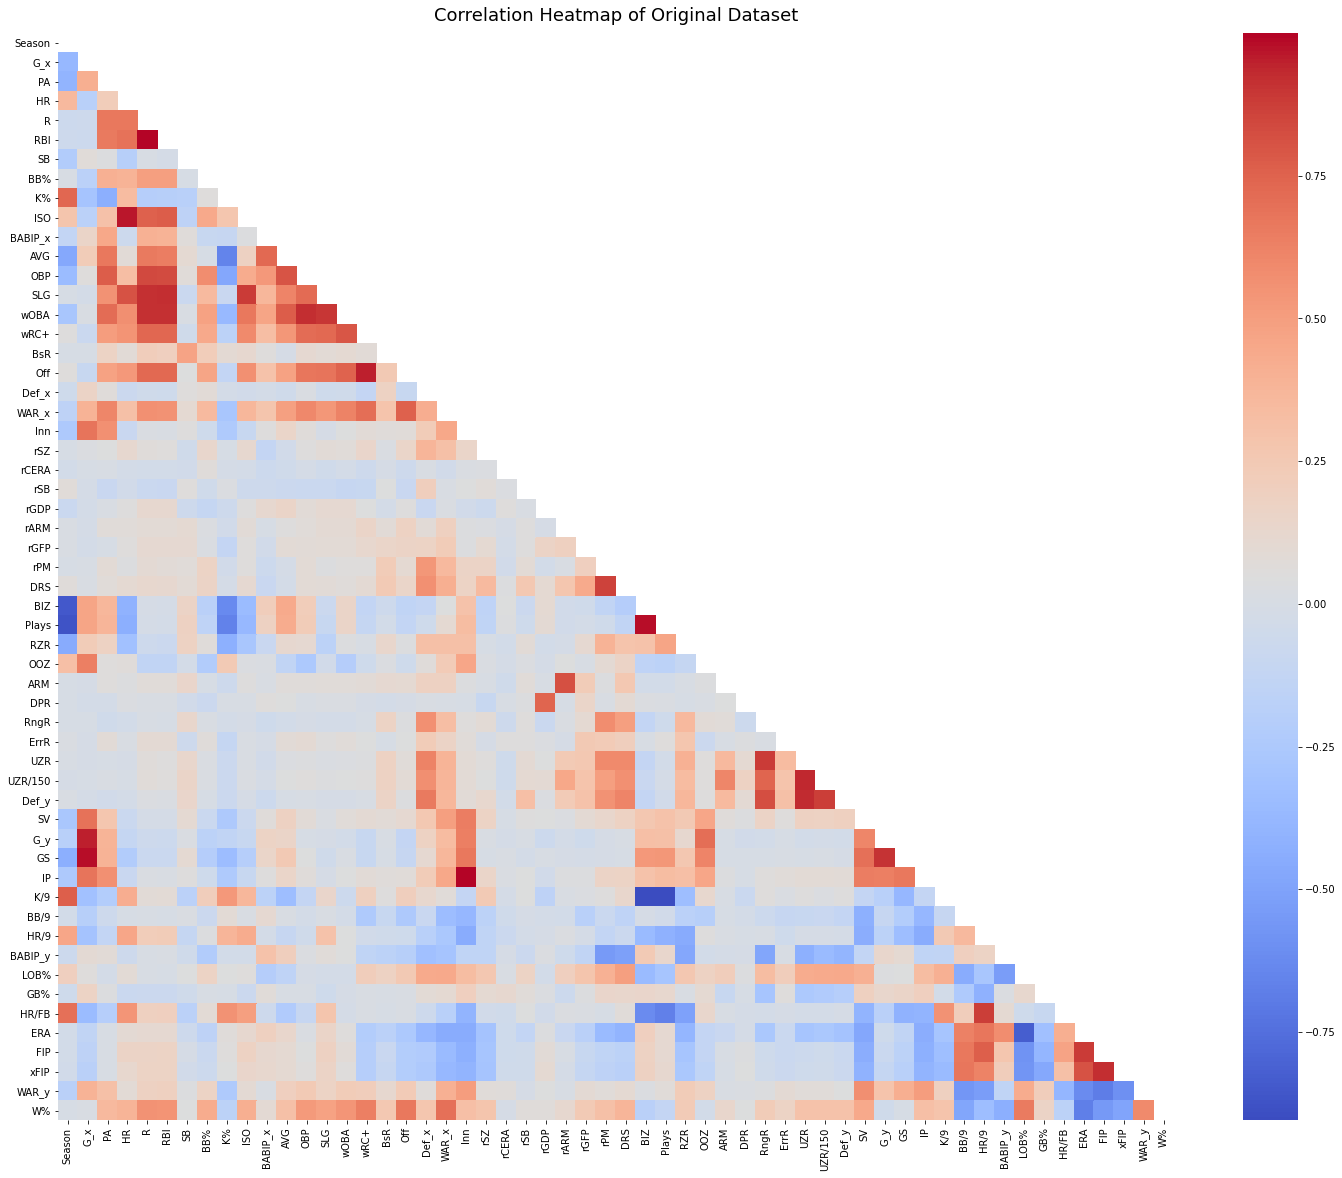

In [22]:
# Create object for graph
win_cor = df.corr()

# Remove half of heatmap
mask = np.zeros(win_cor.shape, dtype = bool)
mask[np.triu_indices(len(mask))] = True

# Graph correlation heatmap
plt.subplots(figsize = (25,20))
cor_heatmap = sns.heatmap(win_cor, xticklabels = win_cor.columns, yticklabels = win_cor.columns, cmap = 'coolwarm', mask = mask)
cor_heatmap.set_title('Correlation Heatmap of Original Dataset', fontdict={'fontsize':18}, pad=12)
plt.savefig('Heatmap1.png', bbox_inches = 'tight')

We see a number of strong correlations between features here, such as slugging percentage (SLG) with runs (R) and runs batted in (RBI), which makes sense. If you hit the ball well and get on base, you'll score more runs. We see a strong negative correlation between strike outs per 9 innings (K/9) with balls in zone (BIZ) and plays made (Plays). This also makes sense, as a team that strikes batters out will have to field fewer balls hit by batters.

In terms of correlations with win percentage (W%), we see the strongest positive correlation with offensive wins above replacement (WAR_x). This is expected, because if your players are batting farther above a given level (an average replacement player), you will likely have more wins. We see the strongest negative correlation with earned run average (ERA). This is also expected, because if you allow opposing teams to score fewer runs against you, you have a better chance of outscoring them for a win.

## V. Data Cleaning - Part 2

Given that we have explored the data as well as some correlations, we should start to remove some features to assist us in developing our model. We will do this through a few ways: first, we will choose to remove features that describe elements of the game rather than aspects which contribute to scoring or a lack thereof. 

As an example, plate appearances (PA) is a feature that describes how many at-bats a team has. Its positive correlation with win percentage would suggest that with more plate appearances, you are more likely to win. However, correlation does not equal causation. You earn more plate appearances through getting on base and avoiding outs. That's why plate appearances also has a strong positive correlation with batting average (AVG) and on base percentage (OBP). Thus, plate appearances is likely not useful in determining <i>how</i> a team wins, but is a byproduct of other features which contribute to winning. Similarly, earned run average (ERA) is not helpful in explaining <i>how</i> to stymie an opponent's scoring; it is a metric of the extent to which an opponent is able/unable to score against that team.

We should remove features like plate appearances and earned run average, as well as other features that explain elements of the game, such as innings played (Inn) and innings pitched (IP).

In [50]:
# Drop unnecessary columns
df.drop(['PA', 'ERA', 'FIP', 'Inn', 'IP', 'LOB%'], axis=1, inplace = True)

The second way we will narrow down the dataset is through recursive feature elimination (RFE). RFE essentially builds a model with every feature, then weighs each feature's importance. This allows us, through a process of elimination, to more easily narrow down the features that maximize the strength of the model while minimizing its cost.

In [51]:
# import tools
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
# Create dataset for Y
y_data = df['W%']

# Create dataset for X, removing target variable and non-numerical features
x_data = df.drop(['W%', 'TeamYear', 'Team'], axis = 1)

# Separate data into train and test groups using 25% of samples in test group
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 100)

# Report number of samples in each group
print('The number of training samples is:', x_train.shape[0])
print('The number of test samples is:', x_test.shape[0])

# Create model for RFE
lr = LinearRegression()

# Fit the model for RFE
lr.fit(x_train, y_train)

# Use Recursive Feature Elimination
rfe = RFE(lr, 15)
rfe = rfe.fit(x_train, y_train)

# Print list of features that show if they are in the top 15 features with boolean test
print('Is a given feature in the best 15 as determined by RFE?:')
print(list(zip(x_train.columns, rfe.support_, rfe.ranking_)))

The number of training samples is: 337
The number of test samples is: 113
Is a given feature in the best 15 as determined by RFE?:
[('Season', False, 15), ('G_x', False, 35), ('HR', True, 1), ('R', False, 2), ('RBI', False, 4), ('SB', False, 12), ('BB%', True, 1), ('K%', False, 5), ('ISO', True, 1), ('BABIP_x', True, 1), ('AVG', True, 1), ('OBP', True, 1), ('SLG', True, 1), ('wOBA', True, 1), ('wRC+', False, 20), ('BsR', False, 25), ('Off', False, 26), ('Def_x', False, 21), ('WAR_x', False, 14), ('rSZ', False, 30), ('rCERA', False, 16), ('rSB', False, 10), ('rGDP', False, 31), ('rARM', False, 27), ('rGFP', False, 19), ('rPM', False, 28), ('DRS', False, 29), ('BIZ', True, 1), ('Plays', True, 1), ('RZR', True, 1), ('OOZ', False, 34), ('ARM', False, 18), ('DPR', False, 22), ('RngR', False, 23), ('ErrR', False, 24), ('UZR', False, 17), ('UZR/150', False, 9), ('Def_y', False, 33), ('SV', False, 8), ('G_y', False, 32), ('GS', False, 11), ('K/9', False, 6), ('BB/9', False, 3), ('HR/9', True, 

C:\Users\saulc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Let's make this more presentable by identifying the 15 columns selected by RFE.

In [53]:
# Best 15 features as determined by RFE
sig_cols = x_train.columns[rfe.support_]
sig_cols

Index(['HR', 'BB%', 'ISO', 'BABIP_x', 'AVG', 'OBP', 'SLG', 'wOBA', 'BIZ',
       'Plays', 'RZR', 'HR/9', 'BABIP_y', 'GB%', 'HR/FB'],
      dtype='object')

Now that we have identified the 15 features we will examine further in the modeling notebook, let's turn them into a new dataset and save it. We should also include the target variable and the identifying features.

In [54]:
df2 = df[['TeamYear', 'Season', 'Team', 'W%', 'HR', 'BB%', 'ISO', 'BABIP_x', 'AVG', 'OBP', 'SLG', 'wOBA', 'BIZ',
       'Plays', 'RZR', 'HR/9', 'BABIP_y', 'GB%', 'HR/FB']]
df2.head()

,TeamYear,Season,Team,W%,HR,BB%,ISO,BABIP_x,AVG,OBP,SLG,wOBA,BIZ,Plays,RZR,HR/9,BABIP_y,GB%,HR/FB
0,2019_Astros,2019,Astros,0.660494,1.777778,0.101,0.221,0.296,0.274,0.352,0.495,0.355,10.864198,8.839506,0.814,1.42,0.270,0.436,0.167
1,2016_Cubs,2016,Cubs,0.635802,1.228395,0.104,0.173,0.302,0.256,0.343,0.429,0.333,12.018519,10.253086,0.853,1.01,0.255,0.469,0.131
2,2011_Yankees,2011,Yankees,0.598765,1.370370,0.099,0.181,0.292,0.263,0.343,0.444,0.345,13.635802,11.320988,0.830,0.94,0.297,0.442,0.099
3,2015_Blue Jays,2015,Blue Jays,0.574074,1.432099,0.091,0.188,0.298,0.269,0.340,0.457,0.344,13.802469,11.462963,0.831,1.08,0.278,0.437,0.110
4,2011_Red Sox,2011,Red Sox,0.555556,1.253086,0.090,0.181,0.314,0.280,0.349,0.461,0.352,13.388889,11.296296,0.844,0.96,0.285,0.423,0.091


In [55]:
# Save cleaned dataset to CSV
df2.to_csv(r'~/Github/DATA601_FinalProject/Data/TeamStats_Combined_Cleaned.csv', index = None)

We are now ready to explore modeling in the next notebook. Please head to Notebook 2 to view model exploration, selection, and refinement.